In [1]:
label = ['비행기','자동차','새','고양이','사슴','개','개구리','말','배','트럭']
label_eng = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# 데이터 로딩
(train_image, train_label), (test_image, test_label) = keras.datasets.cifar10.load_data()

In [4]:
train_image.shape, test_image.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
import numpy as np
np.unique(train_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

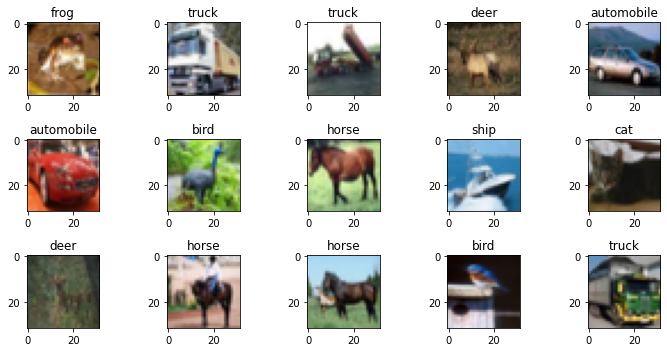

In [6]:
# 15개 이미지 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(train_image[i])
    plt.title(label_eng[train_label[i][0]])
plt.tight_layout()
plt.show()

In [7]:
LEARNING_RATE = 0.0001250000059371814
N_EPOCHS = 100
N_BATCHS = 512

In [8]:
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]
IMAGE_SIZE = 32
N_CLASS = 10

In [9]:
X_train = train_image/255
X_test = test_image/255

y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [10]:
train_label[0]

array([6], dtype=uint8)

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)\
                               .repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [12]:
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST/N_BATCHS))
DROPOUT_RATE = 0.5

In [13]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(keras.layers.Flatten())
    
    #Hidden Layer
    model.add(keras.layers.Dense(256, activation='relu'))

    model.add(keras.layers.Dense(256, activation='relu'))

    model.add(keras.layers.Dense(256, activation='relu'))

    model.add(keras.layers.Dense(256, activation='relu'))

    model.add(keras.layers.Dense(256, activation='relu'))

    model.add(keras.layers.Dense(256, activation='relu'))

    #Output Layer
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [14]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               6

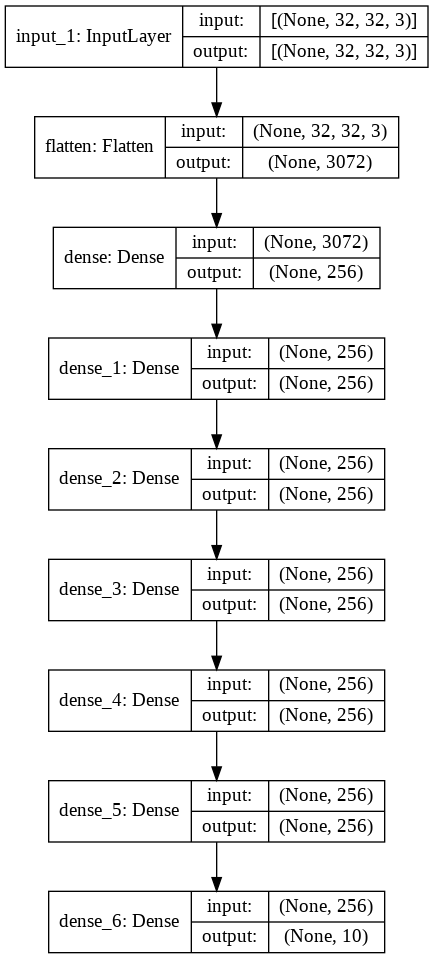

In [15]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [16]:
history = model.fit(train_dataset,
          epochs=N_EPOCHS,
          steps_per_epoch=steps_per_epoch,
          validation_data=val_dataset,
          validation_steps=validation_steps)

Epoch 1/100
97/97 [==============================] - 5s 21ms/step - loss: 2.1292 - accuracy: 0.2086 - val_loss: 1.8206 - val_accuracy: 0.3531
Epoch 2/100
97/97 [==============================] - 2s 18ms/step - loss: 1.7924 - accuracy: 0.3571 - val_loss: 1.6867 - val_accuracy: 0.3948
Epoch 3/100
97/97 [==============================] - 2s 18ms/step - loss: 1.6729 - accuracy: 0.4025 - val_loss: 1.6433 - val_accuracy: 0.4113
Epoch 4/100
97/97 [==============================] - 2s 18ms/step - loss: 1.6105 - accuracy: 0.4272 - val_loss: 1.5667 - val_accuracy: 0.4379
Epoch 5/100
97/97 [==============================] - 2s 18ms/step - loss: 1.5561 - accuracy: 0.4470 - val_loss: 1.5366 - val_accuracy: 0.4462
Epoch 6/100
97/97 [==============================] - 2s 18ms/step - loss: 1.5296 - accuracy: 0.4562 - val_loss: 1.5057 - val_accuracy: 0.4660
Epoch 7/100
97/97 [==============================] - 2s 18ms/step - loss: 1.4827 - accuracy: 0.4713 - val_loss: 1.4867 - val_accuracy: 0.4669
Epoch 

In [20]:
# ReduceLROnPlateau callback
lrp_callback = keras.callbacks.ReduceLROnPlateau(patience=4,
                                                 monitor='val_loss', 
                                                 factor=0.5, 
                                                 verbose=1)  

# Callback
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps, 
                    callbacks=[lrp_callback])      

Epoch 1/100
97/97 [==============================] - 3s 22ms/step - loss: 0.3985 - accuracy: 0.8638 - val_loss: 2.1358 - val_accuracy: 0.5245
Epoch 2/100
97/97 [==============================] - 2s 22ms/step - loss: 0.3949 - accuracy: 0.8634 - val_loss: 2.1805 - val_accuracy: 0.5281
Epoch 3/100
97/97 [==============================] - 2s 21ms/step - loss: 0.3873 - accuracy: 0.8670 - val_loss: 2.2126 - val_accuracy: 0.5168
Epoch 4/100
97/97 [==============================] - 2s 21ms/step - loss: 0.3830 - accuracy: 0.8689 - val_loss: 2.2482 - val_accuracy: 0.5189
Epoch 5/100
97/97 [==============================] - 2s 21ms/step - loss: 0.3777 - accuracy: 0.8698 - val_loss: 2.2907 - val_accuracy: 0.5255

Epoch 00005: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 6/100
97/97 [==============================] - 2s 21ms/step - loss: 0.3149 - accuracy: 0.8994 - val_loss: 2.2658 - val_accuracy: 0.5300
Epoch 7/100
97/97 [==============================] - 2s 21ms/step - 

In [51]:
def plot_result(history, ymin=None, ymax=None):
    plt.figure(figsize=(15,10))

    plt.figure(figsize=(15,10))

    plt.subplot(1,2,1)
    plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label='train loss')
    plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label='validation loss')
    plt.title('LOSS')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin, ymax)
    plt.legend()
        
    plt.subplot(1,2,2)
    plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label='train accuracy')
    plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label='validation accuracy')
    plt.title('ACCURACY')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin, ymax)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

<Figure size 1080x720 with 0 Axes>

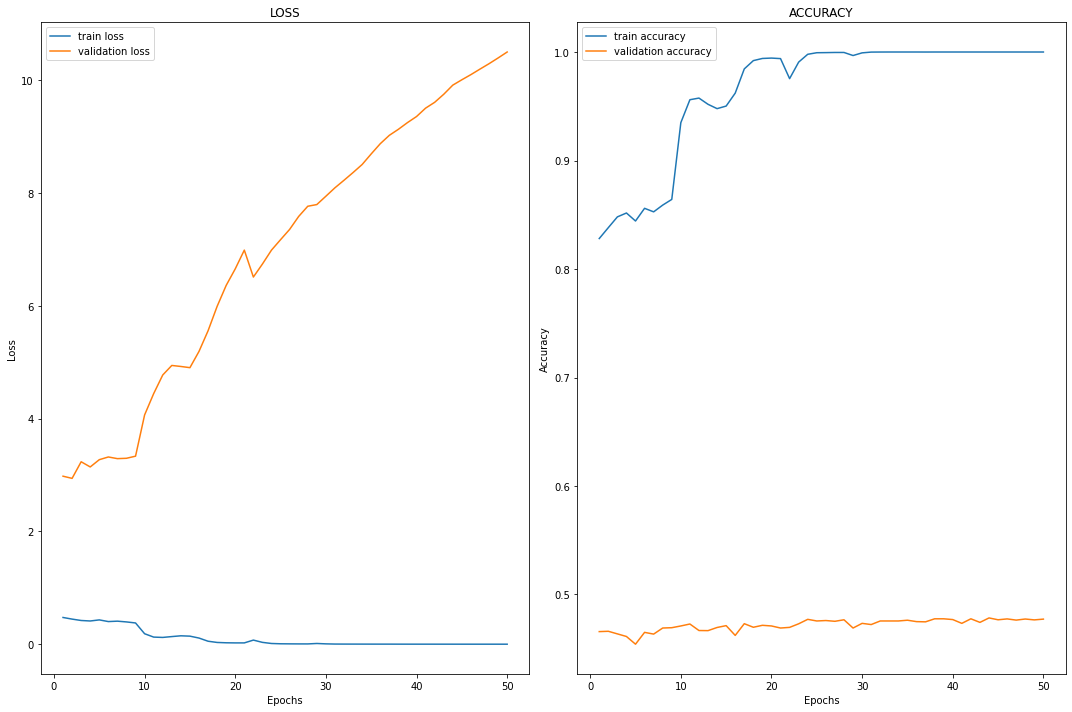

In [113]:
plot_result(history)

In [114]:
model.evaluate(val_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 10.4985 - accuracy: 0.4773


[10.498455047607422, 0.4772999882698059]

In [17]:
def create_BN_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(keras.layers.Flatten())

    #Hidden
    model.add(keras.layers.Dense(256))  #Fully Connected Layer(Dense)
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())  #Activation Layer

    model.add(keras.layers.Dense(256))  
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())  

    model.add(keras.layers.Dense(128))  
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())  

    model.add(keras.layers.Dense(128))  
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())  

    #Output
    model.add(keras.layers.Dense(N_CLASS))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Softmax())

    #컴파일
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [18]:
model_bn = create_BN_model()
model_bn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               786688    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)              

In [19]:
history_bn = model_bn.fit(train_dataset,
             epochs=N_EPOCHS,
             steps_per_epoch=steps_per_epoch,
             validation_data=val_dataset,
             validation_steps=validation_steps,
             callbacks=[lrp_callback])

NameError: ignored

In [83]:
model_bn.evaluate(val_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 2.0738 - accuracy: 0.4620


[2.0737688541412354, 0.4620000123977661]